In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\user\OneDrive\Desktop\term 3\project_data.csv")
data.head()

ID    IV  A1   A2  A3  A4  A5  A6  A7  A8  ...  A14   A15   A16  A17  \
0  1443894  2049  44  8.0  11   0   0   0   0  38  ...    0  0.52  0.69    0   
1  1810849    48   0  8.0   0   0   0   0   0   1  ...    0  0.59  0.78    1   
2  2264999   318   2  9.0   0   0   0   0   0   0  ...    0  0.94  0.79    1   
3  1931676    62   4  2.0   0   0   0  15  30   7  ...    0  0.51  0.47    0   
4  2070885     2   0  8.0   0   0   0   0   1   0  ...    0  0.82  0.81    0   

   A18  A19  A20        A21  A22  Target  
0    0    0    1  17.078971    0       0  
1    0    0    1  17.022384    0       0  
2    0    0    0  17.024773    0       0  
3    0    0    1  17.074995    0       0  
4    0    0    1  17.072697    0       0  

[5 rows x 25 columns]

In [3]:
data.shape

(34281, 25)

In [4]:
data.describe(include='all')

ID             IV            A1            A2            A3  \
count  3.428100e+04   34281.000000  34281.000000  32538.000000  34281.000000   
mean   1.979838e+06     236.252005     36.126367      7.355185     22.543071   
std    6.384855e+05    3326.574620    427.707021      6.165307    359.486291   
min    1.058628e+06   -2999.000000      0.000000      0.000000      0.000000   
25%    1.464342e+06       2.000000      0.000000      2.000000      0.000000   
50%    1.841719e+06       8.000000      0.000000      8.000000      0.000000   
75%    2.254242e+06      40.000000      4.000000      8.000000      0.000000   
max    3.274754e+06  366924.000000  50547.000000     52.000000  31750.000000   

                 A4             A5             A6             A7  \
count  34281.000000   34281.000000   34281.000000   34281.000000   
mean       1.695371     151.959044     274.418453     387.933637   
std       36.195759    2274.087109    4065.441226    5443.804648   
min        0.000000       0.000000       0.000000       0.000000   
25%        0.000000       0.000000       0.000000       0.000000   
50%        0.000000       0.000000       2.000000       4.000000   
75%        0.000000      18.000000      33.000000      48.000000   
max     2999.000000  260660.000000  438020.000000  533540.000000   

                 A8  ...           A14           A15           A16  \
count  34281.000000  ...  34281.000000  34281.000000  34281.000000   
mean      36.482746  ...      1.744757     -5.742893     -5.368822   
std      375.931751  ...     26.077507     24.618128     23.938095   
min        0.000000  ...      0.000000    -99.000000    -99.000000   
25%        0.000000  ...      0.000000      0.590000      0.610000   
50%        1.000000  ...      0.000000      0.810000      0.790000   
75%        6.000000  ...      0.000000      0.960000      0.940000   
max    21071.000000  ...   1488.000000      1.000000      1.000000   

                A17           A18           A19           A20           A21  \
count  34281.000000  34281.000000  34281.000000  34281.000000  34281.000000   
mean       0.208658      0.000321      0.131939      0.962370     17.049826   
std        0.406355      0.017910      0.338429      0.190303      0.028818   
min        0.000000      0.000000      0.000000      0.000000     17.000005   
25%        0.000000      0.000000      0.000000      1.000000     17.024869   
50%        0.000000      0.000000      0.000000      1.000000     17.049813   
75%        0.000000      0.000000      0.000000      1.000000     17.074796   
max        1.000000      1.000000      1.000000      1.000000     17.099995   

                A22        Target  
count  34281.000000  34281.000000  
mean       0.000204      0.329424  
std        0.014288      0.470011  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      1.000000  
max        1.000000      1.000000  

[8 rows x 25 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34281 entries, 0 to 34280
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      34281 non-null  int64  
 1   IV      34281 non-null  int64  
 2   A1      34281 non-null  int64  
 3   A2      32538 non-null  float64
 4   A3      34281 non-null  int64  
 5   A4      34281 non-null  int64  
 6   A5      34281 non-null  int64  
 7   A6      34281 non-null  int64  
 8   A7      34281 non-null  int64  
 9   A8      34281 non-null  int64  
 10  A9      34281 non-null  int64  
 11  A10     34281 non-null  int64  
 12  A11     34281 non-null  int64  
 13  A12     34281 non-null  int64  
 14  A13     34281 non-null  int64  
 15  A14     34281 non-null  int64  
 16  A15     34281 non-null  float64
 17  A16     34281 non-null  float64
 18  A17     34281 non-null  int64  
 19  A18     34281 non-null  int64  
 20  A19     34281 non-null  int64  
 21  A20     34281 non-null  int64  
 22

In [6]:
data.isnull().sum()

ID           0
IV           0
A1           0
A2        1743
A3           0
A4           0
A5           0
A6           0
A7           0
A8           0
A9           0
A10          0
A11          0
A12          0
A13          0
A14          0
A15          0
A16          0
A17          0
A18          0
A19          0
A20          0
A21          0
A22          0
Target       0
dtype: int64

In [7]:
data['Target'].value_counts()

0    22988
1    11293
Name: Target, dtype: int64

<AxesSubplot:xlabel='Target', ylabel='count'>

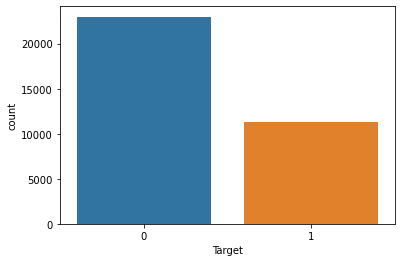

In [8]:
sns.countplot(data['Target'])

In [9]:
data['A2'].fillna(data['A2'].mean(),inplace=True)
data['A2'].isnull().sum()

0

In [10]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(data.drop('Target', axis=1), data['Target'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [11]:
oversampled['Target'].value_counts()

1    22988
0    22988
Name: Target, dtype: int64

<AxesSubplot:xlabel='Target', ylabel='count'>

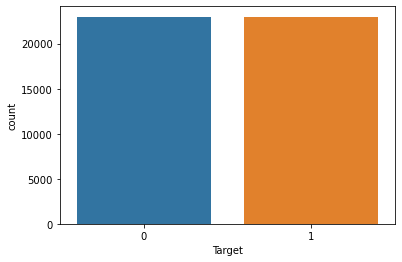

In [13]:
sns.countplot(oversampled['Target'])

In [14]:
def plot_categories( data , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( data , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

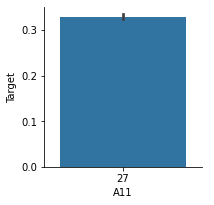

In [15]:
plot_categories( data , cat = 'A11' , target = 'Target' )


* since the value of A11 is the same we can ignore it.

In [16]:
oversampled=oversampled.drop(['ID','A11'],axis=1)

In [17]:
X = oversampled.drop('Target',axis=1)
y = oversampled[["Target"]]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =1)

In [18]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(x_train,y_train)
mutual_info

array([0.17345293, 0.00572119, 0.15990166, 0.01497468, 0.0302187 ,
       0.22377459, 0.2236932 , 0.21787638, 0.0637982 , 0.07646403,
       0.07605816, 0.07609394, 0.        , 0.02172247, 0.22890993,
       0.22083762, 0.01619321, 0.00389112, 0.00155891, 0.00557147,
       0.00158299, 0.        ])

In [19]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=x_train.columns
mutual_info.sort_values(ascending=False)

A15    0.228910
A5     0.223775
A6     0.223693
A16    0.220838
A7     0.217876
IV     0.173453
A2     0.159902
A9     0.076464
A12    0.076094
A10    0.076058
A8     0.063798
A4     0.030219
A14    0.021722
A17    0.016193
A3     0.014975
A1     0.005721
A20    0.005571
A18    0.003891
A21    0.001583
A19    0.001559
A13    0.000000
A22    0.000000
dtype: float64

<AxesSubplot:>

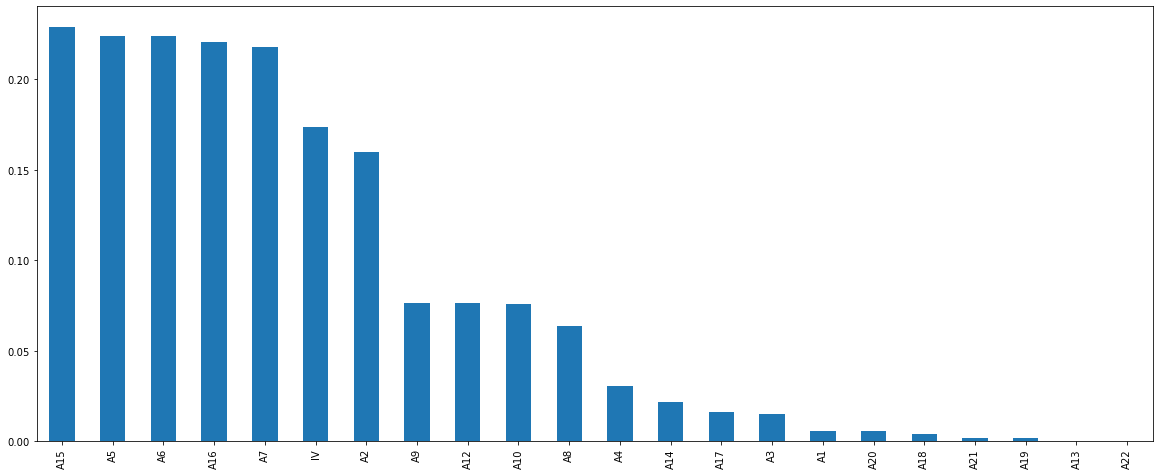

In [20]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [21]:
from sklearn.feature_selection import SelectKBest

In [22]:
sel_col=SelectKBest(mutual_info_classif,k=9)
sel_col.fit(x_train,y_train)
x_train.columns[sel_col.get_support()]

Index(['IV', 'A2', 'A5', 'A6', 'A7', 'A9', 'A10', 'A15', 'A16'], dtype='object')

In [23]:
x_train=x_train.drop(['A2','A14','A3','A1','A4','A15','A20','A19','A17','A13','A18','A21','A22'],axis=1)
x_test=x_test.drop(['A2','A14','A3','A1','A4','A15','A20','A19','A17','A13','A18','A21','A22'],axis=1)

In [24]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [25]:
train_pred =lr.predict(x_train)
test_pred  =lr.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train,train_pred)
print(confusion_matrix)

[[16664  1706]
 [ 5750 12660]]


In [27]:
acc_train= accuracy_score(y_train,train_pred )
print('Accuracy for training data' , acc_train)

Accuracy for training data 0.7972811310494834


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,test_pred)
print(confusion_matrix)

[[4179  439]
 [1374 3204]]


In [29]:
acc_test = accuracy_score(y_test, test_pred)
print('Accuracy for test data' , acc_test)

Accuracy for test data 0.8028490648107873


In [30]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))
print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.74      0.91      0.82     18370
           1       0.88      0.69      0.77     18410

    accuracy                           0.80     36780
   macro avg       0.81      0.80      0.79     36780
weighted avg       0.81      0.80      0.79     36780

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.75      0.90      0.82      4618
           1       0.88      0.70      0.78      4578

    accuracy                           0.80      9196
   macro avg       0.82      0.80      0.80      9196
weighted avg       0.82      0.80      0.80      9196

